In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Project"

 DatasetAfricaMalaria.csv	 project_milestone1.ipynb
 DatasetAfricaMalaria.gsheet	'Project Plan.gdoc'
'Malaria Presentation.gslides'	 SmartEskindChang_Project_Proposal.docx


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Project/DatasetAfricaMalaria.csv')

df.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [ ]:
df.shape

(594, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [ ]:
df.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,594.000000,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,110.000000,132.000000,588.000000,588.000000,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,14.361727,32.174621,56.836650,1.389371,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,7.088038,21.693458,18.086328,1.199693,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,2.300000,7.950000,11.020000,-3.450000,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,7.200000,18.262500,43.057500,0.410000,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,15.950000,22.755000,58.445000,1.675000,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,20.315000,39.225000,71.205000,2.130000,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,25.540000,88.290000,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [ ]:
#preproccessing data
#replace null values with mean of each column for country subsetted dataframe
def fillna_country(df,country,col):
  country_data = df.loc[lambda df: df['Country Name'] == country]

  if country_data[col].isna().sum() > 0:
    if country_data[col].notnull().sum() > 0:
      country_mean = country_data[col].mean()

      for i in country_data.index:
        null_check = df[col][i] > 0
        if null_check == False:
          df[col][i] = country_mean
      
def fillna_dataframe(df):
  for country in df['Country Name'].unique():
    for col in df.iloc[:, 3:24]:
      fillna_country(df,country,col)
    for col in df.iloc[:, 3:24]:
      df[col].fillna(df[col].mean(), inplace=True)
  
fillna_dataframe(df)

In [ ]:
#all values are now non null
df.isnull().sum()

Country Name                                                                               0
Year                                                                                       0
Country Code                                                                               0
Incidence of malaria (per 1,000 population at risk)                                        0
Malaria cases reported                                                                     0
Use of insecticide-treated bed nets (% of under-5 population)                              0
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    0
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      0
People using safely managed drinking water services (% of population)                      0
People using safely managed drinking water services, rural (% of rural population)         0
People using safely managed drinking water services, urban (% of urban

In [ ]:
df.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,594.000000,594.000000,5.940000e+02,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,14.361727,32.174621,56.836650,1.389371,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,156.888708,2.109882e+06,9.474045,8.538874,5.213260,10.845365,3.860314,13.123273,8.757020,3.038869,10.196170,17.994596,1.193608,17.994387,1.448858,17.195701,18.475601,9.084895,26.171519,23.472147,21.281183,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,2.300000,7.950000,11.020000,-3.450000,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,35.355000,3.705750e+03,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,14.361727,32.174621,43.635000,0.412500,29.627500,2.522500,52.517500,37.465000,78.387500,18.272500,9.050000,31.142500,-6.369028,0.824782
50%,2012.000000,190.087491,2.014490e+05,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,14.361727,32.174621,58.405000,1.660000,41.595000,3.725000,64.620000,51.365000,84.905000,33.115000,19.895000,45.465000,6.744051,18.611308
75%,2015.000000,337.367500,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,14.361727,32.174621,70.372500,2.127500,56.365000,4.435000,78.942500,61.405000,89.865000,54.515000,36.640000,57.627500,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,25.540000,88.290000,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Target variable Distribution Plot')

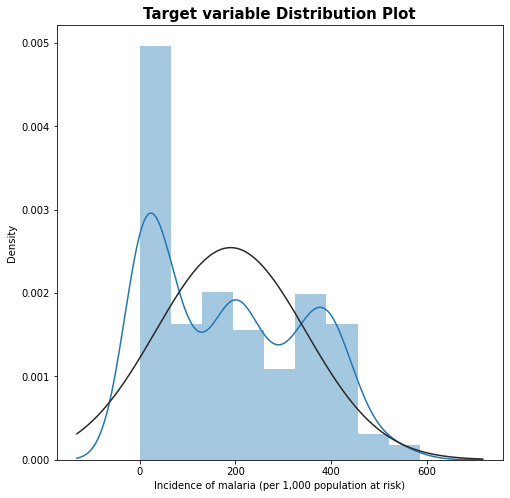

In [ ]:
#check target variable distribution
from scipy.stats import norm
plt.figure(figsize=(8,8))
sns.distplot(df['Incidence of malaria (per 1,000 population at risk)'], fit=norm)
plt.title("Target variable Distribution Plot",size=15, weight='bold')

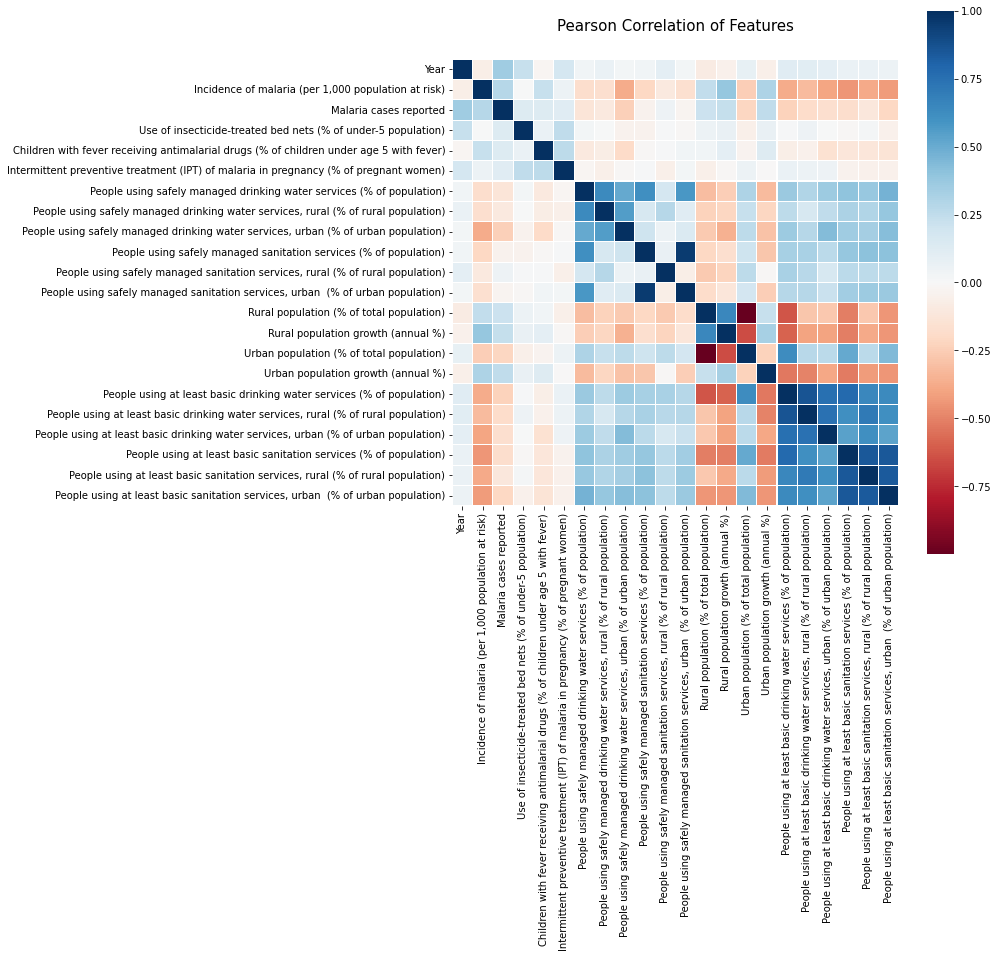

In [ ]:
#check for features that are highly correlated 
features_for_plot = df.drop(columns=['latitude', 'longitude', 'geometry'])
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(features_for_plot.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

In [ ]:
#dropping highly correlated features
features = df.drop(columns=['latitude', 'longitude', 'geometry', 'Year', 
                            'Incidence of malaria (per 1,000 population at risk)', 'Country Name','Country Code', 
                            'People using at least basic sanitation services, rural (% of rural population)',
                            'People using at least basic sanitation services, urban  (% of urban population)',
                            'People using at least basic drinking water services, urban (% of urban population)',
                            'People using at least basic drinking water services, rural (% of rural population)'])

X = features
Y = df['Incidence of malaria (per 1,000 population at risk)']

In [ ]:
X.head()

,Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
0,26.0,42.530303,30.201639,15.013958,33.47899,12.470568,51.549545,18.240000,19.960000,17.330000,34.65,-0.60,65.35,2.71,91.68,85.85
1,1533485.0,18.000000,29.800000,1.500000,33.47899,12.470568,51.549545,28.768939,14.361727,32.174621,42.48,1.91,57.52,5.01,47.96,37.26
2,0.0,42.530303,30.201639,15.013958,33.47899,12.470568,51.549545,28.768939,14.361727,32.174621,58.44,1.99,41.56,4.09,63.78,11.80
3,390.0,42.530303,30.201639,15.013958,33.47899,12.470568,83.960000,28.768939,14.361727,32.174621,42.07,-1.44,57.93,4.80,78.89,61.60
4,44246.0,42.530303,30.201639,15.013958,33.47899,12.470568,51.549545,28.768939,14.361727,32.174621,77.00,2.16,23.00,5.91,52.27,15.60


In [ ]:
#split training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
X_train = X_train_std
X_test = X_test_std

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_regressor = RandomForestRegressor(random_state=42)

rf_params = {'max_depth':np.arange(1,10,1),
             'min_samples_split':np.arange(2,50,1),
             'min_samples_leaf':np.arange(2,50,1),
             'max_features':['sqrt', 'log2']}

rf_regressor_cv = RandomizedSearchCV(rf_regressor, rf_params, cv=5, scoring='neg_root_mean_squared_error', random_state=42)


rf_regressor_cv.fit(X_train, y_train)
rf_regressor_cv.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 44}

In [ ]:
np.random.seed(42)

best_rf_regressor = RandomForestRegressor(max_depth = 9, max_features = 'sqrt', min_samples_leaf= 8, min_samples_split=44)
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=44)

In [ ]:
from sklearn.metrics import mean_squared_error

train_r2_rf = round(best_rf_regressor.score(X_train, y_train),2)
print('Training R2 score of Random Forest is {}'.format(train_r2_rf))
y_train_predicted_rf = best_rf_regressor.predict(X_train)
rmse_train_rf = (np.sqrt(mean_squared_error(y_train, y_train_predicted_rf)))
print('RMSE on the training set for the Random Forest model is: {}'.format(rmse_train_rf))

Training R2 score of Random Forest is 0.68
RMSE on the training set for the Random Forest model is: 90.25105081620748


In [ ]:
y_test_predicted_rf = best_rf_regressor.predict(X_test)
rmse_test_rf= (np.sqrt(mean_squared_error(y_test, y_test_predicted_rf)))
print("RMSE on testing set is for the Random Forest model is: {}".format(rmse_test_rf))

RMSE on testing set is for the Random Forest model is: 100.08270970565918


In [ ]:
rf_importance = pd.concat([pd.DataFrame(X.columns, columns={'Feature'}),pd.DataFrame(np.transpose(best_rf_regressor.feature_importances_), columns={'Importance'})], axis = 1) 
rf_importance.sort_values(by='Importance', ascending=False, inplace=True)
rf_importance

,Feature,Importance
15,People using at least basic sanitation service...,0.261495
13,Urban population growth (annual %),0.137843
14,People using at least basic drinking water ser...,0.136019
0,Malaria cases reported,0.130397
11,Rural population growth (annual %),0.114433
10,Rural population (% of total population),0.054924
12,Urban population (% of total population),0.043015
6,People using safely managed drinking water ser...,0.040836
7,People using safely managed sanitation service...,0.029254
8,People using safely managed sanitation service...,0.013275


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(random_state=42)

adaboost_params = dict(learning_rate=np.arange(0.01,1.0,0.05), 
                 n_estimators=np.arange(10,2000,10),
                 loss = ['linear', 'square', 'exponential'])

adaboost_cv = RandomizedSearchCV(adaboost, adaboost_params, random_state=42, cv=5, scoring='neg_root_mean_squared_error')
adaboost_optimized = adaboost_cv.fit(X_train, y_train)
print('best params: ', adaboost_optimized.best_params_)

best params:  {'n_estimators': 690, 'loss': 'exponential', 'learning_rate': 0.01}


In [ ]:
best_adaboost = AdaBoostRegressor(n_estimators= 690, loss='exponential', learning_rate=0.01)
best_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, loss='exponential', n_estimators=690)

In [ ]:
train_r2_adaboost = round(best_adaboost.score(X_train, y_train),2)
print('Training R2 score of Adaboost Regressor is {}'.format(train_r2_adaboost))
y_train_predicted_adaboost = best_adaboost.predict(X_train)
rmse_train_adaboost = (np.sqrt(mean_squared_error(y_train, y_train_predicted_adaboost)))
print('RMSE on the training set for the Adaboost Regressor is: {}'.format(rmse_train_adaboost))

Training R2 score of Adaboost Regressor is 0.66
RMSE on the training set for the Adaboost Regressor is: 92.31457998945251


In [ ]:
y_test_predicted_adaboost = best_adaboost.predict(X_test)
rmse_test_adaboost= (np.sqrt(mean_squared_error(y_test, y_test_predicted_adaboost)))
print("RMSE on testing set is for the Adaboost Regressor is: {}".format(rmse_test_adaboost))

RMSE on testing set is for the Adaboost Regressor is: 100.23617588655539


In [ ]:
adaboost_importance = pd.concat([pd.DataFrame(X.columns, columns={'Feature'}),pd.DataFrame(np.transpose(best_adaboost.feature_importances_), columns={'Importance'})], axis = 1) 
adaboost_importance.sort_values(by='Importance', ascending=False, inplace=True)
adaboost_importance

,Feature,Importance
15,People using at least basic sanitation service...,0.353653
14,People using at least basic drinking water ser...,0.175116
0,Malaria cases reported,0.133836
11,Rural population growth (annual %),0.110452
13,Urban population growth (annual %),0.098180
5,People using safely managed drinking water ser...,0.031015
6,People using safely managed drinking water ser...,0.026204
12,Urban population (% of total population),0.019427
7,People using safely managed sanitation service...,0.014086
10,Rural population (% of total population),0.011908


Stochastic Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(random_state=42)
 
gb_params = dict(learning_rate=np.arange(0.05,0.3,0.05), 
                     n_estimators=np.arange(100,1000,100), 
                     subsample = np.arange(0.1,0.9,0.05),
                     max_depth=[int(i) for i in np.arange(1,10,1)],
                     max_features = ['sqrt', 'log2']) 

gb_cv = RandomizedSearchCV(gb_regressor, gb_params, random_state=42, cv=5, scoring='neg_root_mean_squared_error')
gb_optimized = gb_cv.fit(X_train, y_train)
print('best params: ', gb_optimized.best_params_)

best params:  {'subsample': 0.6000000000000002, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.1}


In [ ]:
np.random.seed(42)

best_gbr = GradientBoostingRegressor(subsample= 0.6000000000000002, n_estimators= 700, max_features= 'sqrt', max_depth= 7, learning_rate= 0.1)
best_gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, max_features='sqrt', n_estimators=700,
                          subsample=0.6000000000000002)

In [ ]:
train_r2_gbr = round(best_gbr.score(X_train, y_train),2)
print('Training R2 score of Gradient Boosting Regressor is {}'.format(train_r2_gbr))
y_train_predicted_gbr = best_gbr.predict(X_train)
rmse_train_gbr = (np.sqrt(mean_squared_error(y_train, y_train_predicted_gbr)))
print('RMSE on the training set for the Gradient Boosting Regressor is: {}'.format(rmse_train_gbr))

Training R2 score of Gradient Boosting Regressor is 1.0
RMSE on the training set for the Gradient Boosting Regressor is: 0.009568623311125648


In [ ]:
y_test_predicted_gbr = best_gbr.predict(X_test)
rmse_test_gbr= (np.sqrt(mean_squared_error(y_test, y_test_predicted_gbr)))
print("RMSE on testing set is for the Gradient Boosting Regressor is: {}".format(rmse_test_gbr))

RMSE on testing set is for the Gradient Boosting Regressor is: 43.71372772505925


In [ ]:
gbr_importance = pd.concat([pd.DataFrame(X.columns, columns={'Feature'}),pd.DataFrame(np.transpose(best_gbr.feature_importances_), columns={'Importance'})], axis = 1) 
gbr_importance.sort_values(by='Importance', ascending=False, inplace=True)
gbr_importance

,Feature,Importance
15,People using at least basic sanitation service...,0.259568
14,People using at least basic drinking water ser...,0.123262
11,Rural population growth (annual %),0.119073
13,Urban population growth (annual %),0.105337
0,Malaria cases reported,0.094870
12,Urban population (% of total population),0.067534
10,Rural population (% of total population),0.067165
6,People using safely managed drinking water ser...,0.032448
7,People using safely managed sanitation service...,0.027506
8,People using safely managed sanitation service...,0.022409


Comapring Models

In [ ]:
models = ['Random Forest', 'Adaboost', 'Gradient Boosting']

training_r2s = [train_r2_rf, train_r2_adaboost, train_r2_gbr]
rmse_trains = [rmse_train_rf, rmse_train_adaboost, rmse_train_gbr]
rmse_tests= [rmse_test_rf, rmse_test_adaboost, rmse_test_gbr]
#Putting them all in a dictionary to create a table
data = {"model": pd.Series(models), 
        "Training R2": pd.Series(training_r2s), 
        "Training RMSE": pd.Series(rmse_trains),
        "Testing RMSE": pd.Series(rmse_tests)}

comparison_df = pd.concat(data, axis = 1) 
comparison_df

,model,Training R2,Training RMSE,Testing RMSE
0,Random Forest,0.68,90.251051,100.082710
1,Adaboost,0.66,92.314580,100.236176
2,Gradient Boosting,1.00,0.009569,43.713728


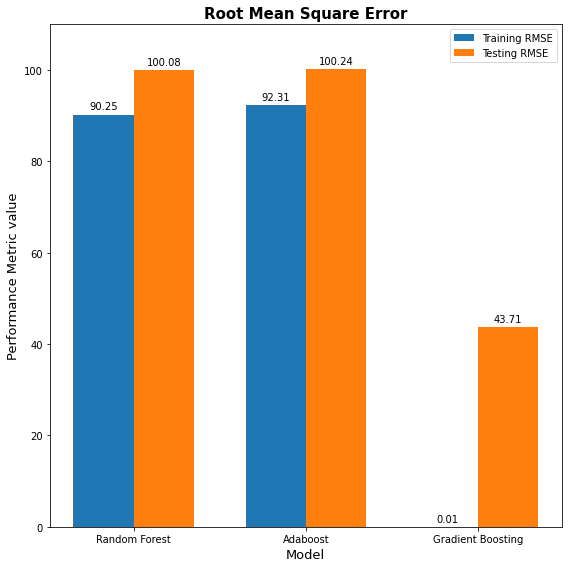

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x - width/2, round(comparison_df.iloc[:,2],2), width, label='Training RMSE')
rects2 = ax.bar(x + width/2, round(comparison_df.iloc[:,3],2), width, label='Testing RMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance Metric value',size=13)
ax.set_xlabel('Model',size=13)
ax.set_title("Root Mean Square Error",size=15, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim([0,110])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()